# Decouple Layers With Dropout

Deep learning neural networks are likely to overfit a training dataset with few examples quickly. Ensembles of neural networks with different model configurations reduce overfitting but require the additional computational expense of training and maintaining multiple models.

A single model can be used to simulate having a large number of different network architectures by randomly dropping out nodes during training. This is called dropout and offers a very computationally cheap and remarkably effective regularization method to reduce overfitting and
generalization error in deep neural networks of all kinds. In this tutorial, you will discover the use of dropout regularization for reducing overfitting and improving the generalization of deep neural networks. After reading this tutorial, you will know:

* Large weights in a neural network signify a more complex network that has overfit the training data.
* Probabilistically dropping out nodes in the network is a simple and effective regularization method.
* A large network with more training epochs and the use of a weight constraint is suggested when using dropout.

## Dropout

In this section, you will discover that you can simulate the development of a large ensemble of neural network models in a single model called dropout, how you can use it to reduce overfitting, and tips for using this technique on your projects.

### Problem With Overfitting

Large neural nets trained on relatively small datasets can overfit the training data. This has the effect of the model learning the statistical noise in the training data, which results in poor performance when the model is evaluated on new data, e.g., a test dataset. Generalization error increases due to overfitting. One approach to reduce overfitting is to fit all possible neural networks on the same dataset and average the predictions from each model. This is not feasible in practice, and can be approximated using a small collection of different models, called an ensemble. Even with the ensemble approximation, it requires multiple models to be fit and stored, which can be a challenge if the models are large, requiring days or weeks to train and tune.

### Randomly Drop Nodes

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel. During training, some number of node outputs are randomly ignored or dropped out. This makes the layer look like and be treated like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different view of the configured layer.

Dropout has the effect of making the training process noisy, forcing nodes within a layer to take on more or less responsibility for the inputs probabilistically. This conceptualization suggests that perhaps dropout breaks up situations where network layers co-adapt to correct mistakes from prior layers, making the model more robust.

Dropout simulates a sparse activation from a given layer, which interestingly, in turn, encourages the network to learn a sparse representation as a side-effect. It may be used as an alternative to activity regularization for encouraging sparse representations in autoencoder models.

Because the outputs of a layer under dropout are randomly subsampled, it reduces the capacity or thinning the network during training. As such, a wider network, e.g., more nodes, may be required when using dropout.

### How to Dropout

Dropout is implemented per layer in a neural network. It can be used with most types of layers, such as dense fully connected layers, convolutional layers, and recurrent layers such as the long short-term memory network layer. Dropout may be implemented on any or all hidden layers in the network and the visible or input layer. It is not used on the output layer.

Dropout is not used after training when making a prediction with the fit network. The weights of the network will be larger than normal because of dropout. Therefore, before finalizing the network, the weights are first scaled by the chosen dropout rate. The network can then be used as per normal to make predictions.

The rescaling of the weights can be performed at training time instead, after each weight update at the end of the minibatch. This is sometimes called inverse dropout and does not require any modification of weights during training. Both the Keras and PyTorch deep learning libraries implement dropout in this way.

Dropout works well in practice, perhaps replacing the need for weight regularization (e.g., weight decay) and activation regularization (e.g., representation sparsity).

### Tips for Using Dropout Regularization

This section provides some tips for using dropout regularization with your neural network.

**Use With All Network Types**

Dropout regularization is a generic approach. It can be used with most, perhaps all, types of neural network models, not least the most common network types of Multilayer Perceptrons, Convolutional Neural Networks, and Long Short-Term Memory Recurrent Neural Networks. In the case of LSTMs, it may be desirable to use different dropout rates for the input and recurrent connections.

**Dropout Rate**

The default interpretation of the dropout hyperparameter is the probability of training a given node in a layer, where 1.0 means no dropout and 0.0 means no outputs from the layer. A good value for dropout in a hidden layer is between 0.5 and 0.8. Input layers use a larger dropout
(retention) rate, such as 0.8.

**Use a Larger Network**

It is common for larger networks (more layers or more nodes) to overfit the training data more easily. When using dropout regularization, it is possible to use larger networks with less risk of overfitting. A large network (more nodes per layer) may be required as dropout will probabilistically reduce the network's capacity. A good rule of thumb is to divide the number of nodes in the layer before dropout by the proposed dropout rate and use that as the number of nodes in the new network that uses dropout. For example, a network with 100 nodes and a proposed dropout rate of 0.5 will require 200 nodes ( $ \frac{100}{0.5} $ ) when using dropout.

**Grid Search Parameters**
Rather than guess at a suitable dropout rate for your network, test different rates systematically (For example, test values between 1.0 and 0.1 in increments of 0.1). This will help you discover what works best for your specific model and dataset and how sensitive the model is to the dropout rate. A more sensitive model may be unstable and could benefit from an increase in size.

**Use a Weight Constraint**
Network weights will increase in size in response to the probabilistic removal of layer activations. Large weight size can be a sign of an unstable network. To counter this effect, a weight constraint can be imposed to force the norm (magnitude) of all weights in a layer to be below a specified value. For example, the maximum norm constraint is recommended with a value between 3 and 4.

**Use With Smaller Datasets**

Like other regularization methods, dropout is more effective on problems with limited training data, and the model is likely to overfit the training data. Problems where there is a large amount of training data, may see less benefit from using dropout.

## Dropout Case Study

In this section, we will demonstrate how to use dropout regularization to reduce the overfitting of an MLP on a simple binary classification problem. This example provides a template for applying dropout regularization to your neural network for classification and regression problems.

### Binary Classification Problem

We will use a standard binary classification problem that defines two two-dimensional concentric circles of observations: one circle for each class. Each observation has two input variables with the same scale and a class output value of 0 or 1. This dataset is called the `circles` dataset because of the shape of the observations in each class when plotted. We can use the `make_circles()` function to generate observations from this problem. We will add noise to the data and seed the random number generator to generate the same samples each time the code is run.

```
# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)
```

We can plot the dataset where the two variables are taken as `x` and `y` coordinates on a graph, and the class value is taken as the color of the observation. The complete example of generating the dataset and plotting it is listed below.

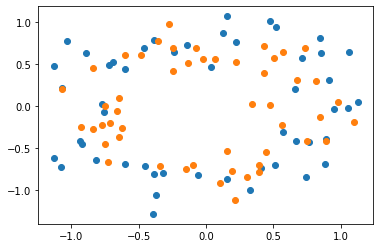

In [1]:
# scatter plot of moons dataset
from sklearn.datasets import make_circles
from matplotlib import pyplot
from numpy import where

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# scatter plot for each class value
for class_value in range(2):
    # select indices of points with the class label
    row_ix = where(y == class_value)
    
    # scatter plot for points with a different color
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1])

# show plot
pyplot.show()

Running the example creates a scatter plot showing the concentric circles shape of the observations in each class. We can see the noise in the dispersal of the points, making the circles less obvious.

This is a good test problem because a line cannot separate the classes, e.g., are not linearly separable, requiring a nonlinear method such as a neural network to address. We have only generated 100 samples, which is small for a neural network, providing the opportunity to overfit the training dataset and have a higher error on the test dataset: a good case for using regularization. Further, the samples have noise, allowing the model to learn aspects of the samples that do not generalize.

### Overfit Multilayer Perceptron Model

We can develop an MLP model to address this binary classification problem. The model will have one hidden layer with more nodes that may be required to solve this problem, providing an opportunity to overfit. We will also train the model for longer than is required to ensure the model overfits. Before we define the model, we will split the dataset into train and test sets, using 30 examples to train the model and 70 to evaluate the fit model's performance.

In [2]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

Next, we can define the model. The model uses 500 nodes in the hidden layer and the rectified linear activation function. A sigmoid activation function is used in the output layer to predict class values of 0 or 1. The model is optimized using the binary cross-entropy loss function, suitable for binary classification problems and the efficient Adam version of gradient descent.

In [3]:
# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

The defined model is then fit on the training data for 4,000 epochs and the default batch size of 32. We will use the test set as the validation dataset to get an idea of the model performance on a holdout dataset during training.

In [4]:
# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=1)

Epoch 1/4000
1/1 [==============================] - 1s 841ms/step - loss: 0.6971 - accuracy: 0.4667 - val_loss: 0.6892 - val_accuracy: 0.5143
Epoch 2/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6932 - accuracy: 0.4667 - val_loss: 0.6907 - val_accuracy: 0.5286
Epoch 3/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.6894 - accuracy: 0.4667 - val_loss: 0.6923 - val_accuracy: 0.6286
Epoch 4/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.6858 - accuracy: 0.5667 - val_loss: 0.6941 - val_accuracy: 0.5000
Epoch 5/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.6823 - accuracy: 0.6000 - val_loss: 0.6959 - val_accuracy: 0.4571
Epoch 6/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.6790 - accuracy: 0.5667 - val_loss: 0.6978 - val_accuracy: 0.4429
Epoch 7/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.6758 - accuracy: 0.5667 - val_loss: 0.6999 - val_accuracy: 0.4286
Epoch 8/4000

Epoch 59/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5914 - accuracy: 0.6667 - val_loss: 0.7869 - val_accuracy: 0.4571
Epoch 60/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5904 - accuracy: 0.6667 - val_loss: 0.7873 - val_accuracy: 0.4571
Epoch 61/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5894 - accuracy: 0.6667 - val_loss: 0.7878 - val_accuracy: 0.4571
Epoch 62/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5883 - accuracy: 0.6667 - val_loss: 0.7883 - val_accuracy: 0.4571
Epoch 63/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5873 - accuracy: 0.6333 - val_loss: 0.7888 - val_accuracy: 0.4571
Epoch 64/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5863 - accuracy: 0.6333 - val_loss: 0.7892 - val_accuracy: 0.4571
Epoch 65/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5852 - accuracy: 0.6333 - val_loss: 0.7897 - val_accuracy: 0.4571
Epoch 

1/1 [==============================] - 0s 22ms/step - loss: 0.5417 - accuracy: 0.7000 - val_loss: 0.8024 - val_accuracy: 0.4857
Epoch 117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5410 - accuracy: 0.7000 - val_loss: 0.8025 - val_accuracy: 0.4857
Epoch 118/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5404 - accuracy: 0.7000 - val_loss: 0.8026 - val_accuracy: 0.4857
Epoch 119/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5398 - accuracy: 0.7000 - val_loss: 0.8028 - val_accuracy: 0.4857
Epoch 120/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5391 - accuracy: 0.7000 - val_loss: 0.8029 - val_accuracy: 0.4857
Epoch 121/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5385 - accuracy: 0.7000 - val_loss: 0.8030 - val_accuracy: 0.4857
Epoch 122/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5378 - accuracy: 0.7000 - val_loss: 0.8030 - val_accuracy: 0.4857
Epoch 123/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.5070 - accuracy: 0.7333 - val_loss: 0.7960 - val_accuracy: 0.5286
Epoch 174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5064 - accuracy: 0.7333 - val_loss: 0.7958 - val_accuracy: 0.5286
Epoch 175/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5058 - accuracy: 0.7333 - val_loss: 0.7957 - val_accuracy: 0.5286
Epoch 176/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5053 - accuracy: 0.7333 - val_loss: 0.7955 - val_accuracy: 0.5286
Epoch 177/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5047 - accuracy: 0.7333 - val_loss: 0.7954 - val_accuracy: 0.5286
Epoch 178/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5042 - accuracy: 0.7333 - val_loss: 0.7952 - val_accuracy: 0.5286
Epoch 179/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.5036 - accuracy: 0.7333 - val_loss: 0.7950 - val_accuracy: 0.5286
Epoch 180/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4763 - accuracy: 0.7333 - val_loss: 0.7821 - val_accuracy: 0.5571
Epoch 231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4757 - accuracy: 0.7333 - val_loss: 0.7818 - val_accuracy: 0.5429
Epoch 232/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4752 - accuracy: 0.7333 - val_loss: 0.7816 - val_accuracy: 0.5429
Epoch 233/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4746 - accuracy: 0.7333 - val_loss: 0.7814 - val_accuracy: 0.5429
Epoch 234/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4741 - accuracy: 0.7333 - val_loss: 0.7811 - val_accuracy: 0.5429
Epoch 235/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4735 - accuracy: 0.7333 - val_loss: 0.7808 - val_accuracy: 0.5429
Epoch 236/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4730 - accuracy: 0.7333 - val_loss: 0.7806 - val_accuracy: 0.5429
Epoch 237/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4446 - accuracy: 0.7667 - val_loss: 0.7738 - val_accuracy: 0.5286
Epoch 288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4440 - accuracy: 0.7667 - val_loss: 0.7738 - val_accuracy: 0.5286
Epoch 289/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4435 - accuracy: 0.7667 - val_loss: 0.7738 - val_accuracy: 0.5286
Epoch 290/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4430 - accuracy: 0.7667 - val_loss: 0.7738 - val_accuracy: 0.5286
Epoch 291/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4425 - accuracy: 0.7667 - val_loss: 0.7739 - val_accuracy: 0.5286
Epoch 292/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4420 - accuracy: 0.7667 - val_loss: 0.7739 - val_accuracy: 0.5286
Epoch 293/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4414 - accuracy: 0.7667 - val_loss: 0.7740 - val_accuracy: 0.5286
Epoch 294/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.4162 - accuracy: 0.8000 - val_loss: 0.7833 - val_accuracy: 0.5429
Epoch 345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4157 - accuracy: 0.8000 - val_loss: 0.7836 - val_accuracy: 0.5429
Epoch 346/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4153 - accuracy: 0.8000 - val_loss: 0.7839 - val_accuracy: 0.5429
Epoch 347/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4148 - accuracy: 0.8000 - val_loss: 0.7841 - val_accuracy: 0.5429
Epoch 348/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4143 - accuracy: 0.8000 - val_loss: 0.7844 - val_accuracy: 0.5429
Epoch 349/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4139 - accuracy: 0.8000 - val_loss: 0.7847 - val_accuracy: 0.5429
Epoch 350/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.4134 - accuracy: 0.8000 - val_loss: 0.7851 - val_accuracy: 0.5429
Epoch 351/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3906 - accuracy: 0.8000 - val_loss: 0.8108 - val_accuracy: 0.5571
Epoch 402/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3902 - accuracy: 0.8000 - val_loss: 0.8114 - val_accuracy: 0.5571
Epoch 403/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3897 - accuracy: 0.8000 - val_loss: 0.8120 - val_accuracy: 0.5571
Epoch 404/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3893 - accuracy: 0.8000 - val_loss: 0.8126 - val_accuracy: 0.5571
Epoch 405/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3889 - accuracy: 0.8000 - val_loss: 0.8131 - val_accuracy: 0.5571
Epoch 406/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3884 - accuracy: 0.8000 - val_loss: 0.8137 - val_accuracy: 0.5571
Epoch 407/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3880 - accuracy: 0.8000 - val_loss: 0.8143 - val_accuracy: 0.5571
Epoch 408/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3666 - accuracy: 0.8333 - val_loss: 0.8537 - val_accuracy: 0.5714
Epoch 459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3662 - accuracy: 0.8333 - val_loss: 0.8547 - val_accuracy: 0.5714
Epoch 460/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3658 - accuracy: 0.8667 - val_loss: 0.8556 - val_accuracy: 0.5714
Epoch 461/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3654 - accuracy: 0.8667 - val_loss: 0.8565 - val_accuracy: 0.5714
Epoch 462/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3650 - accuracy: 0.8667 - val_loss: 0.8572 - val_accuracy: 0.5714
Epoch 463/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3646 - accuracy: 0.8667 - val_loss: 0.8579 - val_accuracy: 0.5714
Epoch 464/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3641 - accuracy: 0.8667 - val_loss: 0.8585 - val_accuracy: 0.5714
Epoch 465/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3434 - accuracy: 0.8667 - val_loss: 0.9075 - val_accuracy: 0.5714
Epoch 516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3429 - accuracy: 0.8667 - val_loss: 0.9085 - val_accuracy: 0.5714
Epoch 517/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3425 - accuracy: 0.8667 - val_loss: 0.9097 - val_accuracy: 0.5714
Epoch 518/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3421 - accuracy: 0.8667 - val_loss: 0.9107 - val_accuracy: 0.5714
Epoch 519/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3417 - accuracy: 0.8667 - val_loss: 0.9118 - val_accuracy: 0.5714
Epoch 520/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3413 - accuracy: 0.8667 - val_loss: 0.9128 - val_accuracy: 0.5714
Epoch 521/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3409 - accuracy: 0.8667 - val_loss: 0.9139 - val_accuracy: 0.5714
Epoch 522/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.3205 - accuracy: 0.8667 - val_loss: 0.9671 - val_accuracy: 0.5857
Epoch 573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3201 - accuracy: 0.8667 - val_loss: 0.9685 - val_accuracy: 0.5857
Epoch 574/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3197 - accuracy: 0.8667 - val_loss: 0.9698 - val_accuracy: 0.5857
Epoch 575/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3193 - accuracy: 0.8667 - val_loss: 0.9710 - val_accuracy: 0.5857
Epoch 576/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3189 - accuracy: 0.8667 - val_loss: 0.9720 - val_accuracy: 0.5857
Epoch 577/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3185 - accuracy: 0.8667 - val_loss: 0.9730 - val_accuracy: 0.5857
Epoch 578/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.3181 - accuracy: 0.8667 - val_loss: 0.9739 - val_accuracy: 0.5857
Epoch 579/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2980 - accuracy: 0.8667 - val_loss: 1.0331 - val_accuracy: 0.5714
Epoch 630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2976 - accuracy: 0.8667 - val_loss: 1.0345 - val_accuracy: 0.5714
Epoch 631/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2972 - accuracy: 0.8667 - val_loss: 1.0358 - val_accuracy: 0.5714
Epoch 632/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2968 - accuracy: 0.8667 - val_loss: 1.0371 - val_accuracy: 0.5714
Epoch 633/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2964 - accuracy: 0.8667 - val_loss: 1.0382 - val_accuracy: 0.5714
Epoch 634/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2960 - accuracy: 0.8667 - val_loss: 1.0392 - val_accuracy: 0.5714
Epoch 635/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2956 - accuracy: 0.8667 - val_loss: 1.0402 - val_accuracy: 0.5714
Epoch 636/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2763 - accuracy: 0.9000 - val_loss: 1.1041 - val_accuracy: 0.5571
Epoch 687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2759 - accuracy: 0.9000 - val_loss: 1.1056 - val_accuracy: 0.5571
Epoch 688/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2755 - accuracy: 0.9000 - val_loss: 1.1069 - val_accuracy: 0.5571
Epoch 689/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2752 - accuracy: 0.9000 - val_loss: 1.1084 - val_accuracy: 0.5571
Epoch 690/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2748 - accuracy: 0.9000 - val_loss: 1.1097 - val_accuracy: 0.5571
Epoch 691/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2744 - accuracy: 0.9000 - val_loss: 1.1112 - val_accuracy: 0.5571
Epoch 692/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2740 - accuracy: 0.9000 - val_loss: 1.1125 - val_accuracy: 0.5571
Epoch 693/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2551 - accuracy: 0.9333 - val_loss: 1.1794 - val_accuracy: 0.5571
Epoch 744/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2547 - accuracy: 0.9333 - val_loss: 1.1805 - val_accuracy: 0.5571
Epoch 745/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2544 - accuracy: 0.9333 - val_loss: 1.1818 - val_accuracy: 0.5571
Epoch 746/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2540 - accuracy: 0.9333 - val_loss: 1.1830 - val_accuracy: 0.5571
Epoch 747/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2537 - accuracy: 0.9333 - val_loss: 1.1843 - val_accuracy: 0.5571
Epoch 748/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2533 - accuracy: 0.9333 - val_loss: 1.1858 - val_accuracy: 0.5571
Epoch 749/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2530 - accuracy: 0.9333 - val_loss: 1.1872 - val_accuracy: 0.5571
Epoch 750/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2361 - accuracy: 0.9333 - val_loss: 1.2556 - val_accuracy: 0.5286
Epoch 801/4000
1/1 [==============================] - 0s 21ms/step - loss: 0.2358 - accuracy: 0.9333 - val_loss: 1.2571 - val_accuracy: 0.5286
Epoch 802/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2355 - accuracy: 0.9333 - val_loss: 1.2587 - val_accuracy: 0.5286
Epoch 803/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2352 - accuracy: 0.9333 - val_loss: 1.2602 - val_accuracy: 0.5286
Epoch 804/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2348 - accuracy: 0.9333 - val_loss: 1.2616 - val_accuracy: 0.5286
Epoch 805/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2345 - accuracy: 0.9333 - val_loss: 1.2632 - val_accuracy: 0.5286
Epoch 806/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2342 - accuracy: 0.9333 - val_loss: 1.2648 - val_accuracy: 0.5286
Epoch 807/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2188 - accuracy: 0.9333 - val_loss: 1.3369 - val_accuracy: 0.5286
Epoch 858/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2186 - accuracy: 0.9333 - val_loss: 1.3386 - val_accuracy: 0.5286
Epoch 859/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2182 - accuracy: 0.9333 - val_loss: 1.3401 - val_accuracy: 0.5286
Epoch 860/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2179 - accuracy: 0.9333 - val_loss: 1.3417 - val_accuracy: 0.5286
Epoch 861/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2177 - accuracy: 0.9333 - val_loss: 1.3430 - val_accuracy: 0.5286
Epoch 862/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.2174 - accuracy: 0.9333 - val_loss: 1.3441 - val_accuracy: 0.5286
Epoch 863/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2170 - accuracy: 0.9333 - val_loss: 1.3454 - val_accuracy: 0.5286
Epoch 864/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.2027 - accuracy: 0.9333 - val_loss: 1.4218 - val_accuracy: 0.5000
Epoch 915/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2024 - accuracy: 0.9333 - val_loss: 1.4230 - val_accuracy: 0.5000
Epoch 916/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2021 - accuracy: 0.9333 - val_loss: 1.4241 - val_accuracy: 0.5000
Epoch 917/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2018 - accuracy: 0.9333 - val_loss: 1.4253 - val_accuracy: 0.5000
Epoch 918/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2016 - accuracy: 0.9333 - val_loss: 1.4267 - val_accuracy: 0.5000
Epoch 919/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2014 - accuracy: 0.9333 - val_loss: 1.4283 - val_accuracy: 0.5000
Epoch 920/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.2011 - accuracy: 0.9333 - val_loss: 1.4299 - val_accuracy: 0.5000
Epoch 921/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1880 - accuracy: 0.9333 - val_loss: 1.5106 - val_accuracy: 0.5000
Epoch 972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1878 - accuracy: 0.9333 - val_loss: 1.5111 - val_accuracy: 0.5000
Epoch 973/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1875 - accuracy: 0.9333 - val_loss: 1.5122 - val_accuracy: 0.5000
Epoch 974/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1873 - accuracy: 0.9333 - val_loss: 1.5142 - val_accuracy: 0.5000
Epoch 975/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1870 - accuracy: 0.9333 - val_loss: 1.5167 - val_accuracy: 0.5000
Epoch 976/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1868 - accuracy: 0.9333 - val_loss: 1.5190 - val_accuracy: 0.5000
Epoch 977/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1866 - accuracy: 0.9333 - val_loss: 1.5207 - val_accuracy: 0.5000
Epoch 978/4000

1/1 [==============================] - 0s 22ms/step - loss: 0.1744 - accuracy: 0.9333 - val_loss: 1.6004 - val_accuracy: 0.5000
Epoch 1029/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1742 - accuracy: 0.9333 - val_loss: 1.6023 - val_accuracy: 0.5000
Epoch 1030/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1739 - accuracy: 0.9333 - val_loss: 1.6042 - val_accuracy: 0.5000
Epoch 1031/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1737 - accuracy: 0.9333 - val_loss: 1.6059 - val_accuracy: 0.5000
Epoch 1032/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1735 - accuracy: 0.9333 - val_loss: 1.6073 - val_accuracy: 0.5000
Epoch 1033/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1733 - accuracy: 0.9333 - val_loss: 1.6086 - val_accuracy: 0.5000
Epoch 1034/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1730 - accuracy: 0.9333 - val_loss: 1.6100 - val_accuracy: 0.5000
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.1620 - accuracy: 0.9667 - val_loss: 1.6932 - val_accuracy: 0.5000
Epoch 1086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1617 - accuracy: 0.9667 - val_loss: 1.6946 - val_accuracy: 0.5000
Epoch 1087/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1615 - accuracy: 0.9667 - val_loss: 1.6958 - val_accuracy: 0.5000
Epoch 1088/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1613 - accuracy: 0.9667 - val_loss: 1.6970 - val_accuracy: 0.5000
Epoch 1089/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1611 - accuracy: 0.9667 - val_loss: 1.6985 - val_accuracy: 0.5000
Epoch 1090/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1609 - accuracy: 0.9667 - val_loss: 1.7005 - val_accuracy: 0.5000
Epoch 1091/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1606 - accuracy: 0.9667 - val_loss: 1.7027 - val_accuracy: 0.5000
Epoch 10

1/1 [==============================] - 0s 22ms/step - loss: 0.1505 - accuracy: 0.9667 - val_loss: 1.7833 - val_accuracy: 0.5000
Epoch 1143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1503 - accuracy: 0.9667 - val_loss: 1.7852 - val_accuracy: 0.5000
Epoch 1144/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1501 - accuracy: 0.9667 - val_loss: 1.7864 - val_accuracy: 0.5000
Epoch 1145/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1499 - accuracy: 0.9667 - val_loss: 1.7873 - val_accuracy: 0.5000
Epoch 1146/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1497 - accuracy: 0.9667 - val_loss: 1.7883 - val_accuracy: 0.5000
Epoch 1147/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1495 - accuracy: 0.9667 - val_loss: 1.7898 - val_accuracy: 0.5000
Epoch 1148/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1493 - accuracy: 0.9667 - val_loss: 1.7917 - val_accuracy: 0.5000
Epoch 11

1/1 [==============================] - 0s 22ms/step - loss: 0.1399 - accuracy: 0.9667 - val_loss: 1.8689 - val_accuracy: 0.5000
Epoch 1200/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.1398 - accuracy: 0.9667 - val_loss: 1.8713 - val_accuracy: 0.5000
Epoch 1201/4000
1/1 [==============================] - 0s 25ms/step - loss: 0.1396 - accuracy: 0.9667 - val_loss: 1.8732 - val_accuracy: 0.5000
Epoch 1202/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1394 - accuracy: 0.9667 - val_loss: 1.8746 - val_accuracy: 0.5000
Epoch 1203/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1392 - accuracy: 0.9667 - val_loss: 1.8758 - val_accuracy: 0.5000
Epoch 1204/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1391 - accuracy: 0.9667 - val_loss: 1.8769 - val_accuracy: 0.5000
Epoch 1205/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1389 - accuracy: 0.9667 - val_loss: 1.8784 - val_accuracy: 0.5000
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.1297 - accuracy: 0.9667 - val_loss: 1.9538 - val_accuracy: 0.5000
Epoch 1257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1295 - accuracy: 0.9667 - val_loss: 1.9551 - val_accuracy: 0.5000
Epoch 1258/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1293 - accuracy: 0.9667 - val_loss: 1.9569 - val_accuracy: 0.5000
Epoch 1259/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1291 - accuracy: 0.9667 - val_loss: 1.9589 - val_accuracy: 0.5000
Epoch 1260/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1289 - accuracy: 0.9667 - val_loss: 1.9610 - val_accuracy: 0.5000
Epoch 1261/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1287 - accuracy: 0.9667 - val_loss: 1.9630 - val_accuracy: 0.5000
Epoch 1262/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1286 - accuracy: 0.9667 - val_loss: 1.9646 - val_accuracy: 0.5000
Epoch 12

1/1 [==============================] - 0s 22ms/step - loss: 0.1206 - accuracy: 0.9667 - val_loss: 2.0343 - val_accuracy: 0.5000
Epoch 1314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1205 - accuracy: 0.9667 - val_loss: 2.0354 - val_accuracy: 0.5000
Epoch 1315/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1203 - accuracy: 0.9667 - val_loss: 2.0371 - val_accuracy: 0.5000
Epoch 1316/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1202 - accuracy: 0.9667 - val_loss: 2.0389 - val_accuracy: 0.5000
Epoch 1317/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1200 - accuracy: 0.9667 - val_loss: 2.0406 - val_accuracy: 0.5000
Epoch 1318/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1198 - accuracy: 0.9667 - val_loss: 2.0423 - val_accuracy: 0.5000
Epoch 1319/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1197 - accuracy: 0.9667 - val_loss: 2.0438 - val_accuracy: 0.5000
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1128 - accuracy: 0.9667 - val_loss: 2.1176 - val_accuracy: 0.5000
Epoch 1371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1127 - accuracy: 0.9667 - val_loss: 2.1183 - val_accuracy: 0.5000
Epoch 1372/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1125 - accuracy: 0.9667 - val_loss: 2.1191 - val_accuracy: 0.5000
Epoch 1373/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1124 - accuracy: 0.9667 - val_loss: 2.1201 - val_accuracy: 0.5000
Epoch 1374/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1123 - accuracy: 0.9667 - val_loss: 2.1214 - val_accuracy: 0.5000
Epoch 1375/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1122 - accuracy: 0.9667 - val_loss: 2.1224 - val_accuracy: 0.5000
Epoch 1376/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1121 - accuracy: 0.9667 - val_loss: 2.1235 - val_accuracy: 0.5000
Epoch 13

1/1 [==============================] - 0s 22ms/step - loss: 0.1060 - accuracy: 0.9667 - val_loss: 2.1970 - val_accuracy: 0.5000
Epoch 1428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1059 - accuracy: 0.9667 - val_loss: 2.1985 - val_accuracy: 0.5000
Epoch 1429/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1058 - accuracy: 0.9667 - val_loss: 2.2000 - val_accuracy: 0.5000
Epoch 1430/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1057 - accuracy: 0.9667 - val_loss: 2.2009 - val_accuracy: 0.5000
Epoch 1431/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1056 - accuracy: 0.9667 - val_loss: 2.2022 - val_accuracy: 0.5000
Epoch 1432/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1055 - accuracy: 0.9667 - val_loss: 2.2042 - val_accuracy: 0.5000
Epoch 1433/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.1054 - accuracy: 0.9667 - val_loss: 2.2065 - val_accuracy: 0.5000
Epoch 14

1/1 [==============================] - 0s 23ms/step - loss: 0.1000 - accuracy: 0.9667 - val_loss: 2.2817 - val_accuracy: 0.5000
Epoch 1485/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0999 - accuracy: 0.9667 - val_loss: 2.2839 - val_accuracy: 0.5000
Epoch 1486/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0998 - accuracy: 0.9667 - val_loss: 2.2854 - val_accuracy: 0.5000
Epoch 1487/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0997 - accuracy: 0.9667 - val_loss: 2.2863 - val_accuracy: 0.5000
Epoch 1488/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0996 - accuracy: 0.9667 - val_loss: 2.2867 - val_accuracy: 0.5000
Epoch 1489/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0995 - accuracy: 0.9667 - val_loss: 2.2872 - val_accuracy: 0.5000
Epoch 1490/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0994 - accuracy: 0.9667 - val_loss: 2.2879 - val_accuracy: 0.5000
Epoch 14

1/1 [==============================] - 0s 22ms/step - loss: 0.0946 - accuracy: 0.9667 - val_loss: 2.3627 - val_accuracy: 0.5000
Epoch 1542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0945 - accuracy: 0.9667 - val_loss: 2.3640 - val_accuracy: 0.5000
Epoch 1543/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0944 - accuracy: 0.9667 - val_loss: 2.3655 - val_accuracy: 0.5000
Epoch 1544/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0943 - accuracy: 0.9667 - val_loss: 2.3668 - val_accuracy: 0.5000
Epoch 1545/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0942 - accuracy: 0.9667 - val_loss: 2.3680 - val_accuracy: 0.5000
Epoch 1546/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0941 - accuracy: 0.9667 - val_loss: 2.3688 - val_accuracy: 0.5000
Epoch 1547/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0940 - accuracy: 0.9667 - val_loss: 2.3698 - val_accuracy: 0.5000
Epoch 15

1/1 [==============================] - 0s 22ms/step - loss: 0.0898 - accuracy: 0.9667 - val_loss: 2.4427 - val_accuracy: 0.5000
Epoch 1599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0896 - accuracy: 0.9667 - val_loss: 2.4440 - val_accuracy: 0.5000
Epoch 1600/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0896 - accuracy: 0.9667 - val_loss: 2.4453 - val_accuracy: 0.5000
Epoch 1601/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0895 - accuracy: 0.9667 - val_loss: 2.4468 - val_accuracy: 0.5000
Epoch 1602/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0894 - accuracy: 0.9667 - val_loss: 2.4486 - val_accuracy: 0.5000
Epoch 1603/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0893 - accuracy: 0.9667 - val_loss: 2.4505 - val_accuracy: 0.5000
Epoch 1604/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0892 - accuracy: 0.9667 - val_loss: 2.4525 - val_accuracy: 0.5000
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0853 - accuracy: 0.9667 - val_loss: 2.5252 - val_accuracy: 0.5143
Epoch 1656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0853 - accuracy: 0.9667 - val_loss: 2.5263 - val_accuracy: 0.5143
Epoch 1657/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0852 - accuracy: 0.9667 - val_loss: 2.5272 - val_accuracy: 0.5143
Epoch 1658/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0851 - accuracy: 0.9667 - val_loss: 2.5280 - val_accuracy: 0.5143
Epoch 1659/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0850 - accuracy: 0.9667 - val_loss: 2.5289 - val_accuracy: 0.5143
Epoch 1660/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0850 - accuracy: 0.9667 - val_loss: 2.5304 - val_accuracy: 0.5143
Epoch 1661/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0849 - accuracy: 0.9667 - val_loss: 2.5320 - val_accuracy: 0.5143
Epoch 16

1/1 [==============================] - 0s 23ms/step - loss: 0.0813 - accuracy: 0.9667 - val_loss: 2.6052 - val_accuracy: 0.5143
Epoch 1713/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0813 - accuracy: 0.9667 - val_loss: 2.6069 - val_accuracy: 0.5143
Epoch 1714/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0812 - accuracy: 0.9667 - val_loss: 2.6081 - val_accuracy: 0.5143
Epoch 1715/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 2.6092 - val_accuracy: 0.5143
Epoch 1716/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0811 - accuracy: 0.9667 - val_loss: 2.6103 - val_accuracy: 0.5143
Epoch 1717/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0810 - accuracy: 0.9667 - val_loss: 2.6113 - val_accuracy: 0.5143
Epoch 1718/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0809 - accuracy: 0.9667 - val_loss: 2.6131 - val_accuracy: 0.5143
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0777 - accuracy: 0.9667 - val_loss: 2.6864 - val_accuracy: 0.5143
Epoch 1770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0776 - accuracy: 0.9667 - val_loss: 2.6874 - val_accuracy: 0.5143
Epoch 1771/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0776 - accuracy: 0.9667 - val_loss: 2.6884 - val_accuracy: 0.5143
Epoch 1772/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0775 - accuracy: 0.9667 - val_loss: 2.6899 - val_accuracy: 0.5143
Epoch 1773/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0774 - accuracy: 0.9667 - val_loss: 2.6914 - val_accuracy: 0.5143
Epoch 1774/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0774 - accuracy: 0.9667 - val_loss: 2.6927 - val_accuracy: 0.5143
Epoch 1775/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0773 - accuracy: 0.9667 - val_loss: 2.6943 - val_accuracy: 0.5143
Epoch 17

1/1 [==============================] - 0s 22ms/step - loss: 0.0743 - accuracy: 0.9667 - val_loss: 2.7647 - val_accuracy: 0.5143
Epoch 1827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0743 - accuracy: 0.9667 - val_loss: 2.7657 - val_accuracy: 0.5143
Epoch 1828/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0742 - accuracy: 0.9667 - val_loss: 2.7671 - val_accuracy: 0.5143
Epoch 1829/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0741 - accuracy: 0.9667 - val_loss: 2.7687 - val_accuracy: 0.5143
Epoch 1830/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0741 - accuracy: 0.9667 - val_loss: 2.7700 - val_accuracy: 0.5143
Epoch 1831/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0740 - accuracy: 0.9667 - val_loss: 2.7714 - val_accuracy: 0.5143
Epoch 1832/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0740 - accuracy: 0.9667 - val_loss: 2.7732 - val_accuracy: 0.5143
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0712 - accuracy: 0.9667 - val_loss: 2.8424 - val_accuracy: 0.5143
Epoch 1884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0712 - accuracy: 0.9667 - val_loss: 2.8439 - val_accuracy: 0.5143
Epoch 1885/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0711 - accuracy: 0.9667 - val_loss: 2.8454 - val_accuracy: 0.5143
Epoch 1886/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0711 - accuracy: 0.9667 - val_loss: 2.8465 - val_accuracy: 0.5143
Epoch 1887/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0710 - accuracy: 0.9667 - val_loss: 2.8477 - val_accuracy: 0.5143
Epoch 1888/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0710 - accuracy: 0.9667 - val_loss: 2.8490 - val_accuracy: 0.5143
Epoch 1889/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0709 - accuracy: 0.9667 - val_loss: 2.8506 - val_accuracy: 0.5143
Epoch 18

1/1 [==============================] - 0s 22ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 2.9200 - val_accuracy: 0.5143
Epoch 1941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0684 - accuracy: 0.9667 - val_loss: 2.9212 - val_accuracy: 0.5143
Epoch 1942/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0683 - accuracy: 0.9667 - val_loss: 2.9222 - val_accuracy: 0.5143
Epoch 1943/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0682 - accuracy: 0.9667 - val_loss: 2.9226 - val_accuracy: 0.5143
Epoch 1944/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0682 - accuracy: 0.9667 - val_loss: 2.9236 - val_accuracy: 0.5143
Epoch 1945/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0682 - accuracy: 0.9667 - val_loss: 2.9254 - val_accuracy: 0.5143
Epoch 1946/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0681 - accuracy: 0.9667 - val_loss: 2.9273 - val_accuracy: 0.5143
Epoch 19

1/1 [==============================] - 0s 22ms/step - loss: 0.0657 - accuracy: 0.9667 - val_loss: 2.9960 - val_accuracy: 0.5000
Epoch 1998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0657 - accuracy: 0.9667 - val_loss: 2.9972 - val_accuracy: 0.5000
Epoch 1999/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0656 - accuracy: 0.9667 - val_loss: 2.9987 - val_accuracy: 0.5000
Epoch 2000/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0656 - accuracy: 0.9667 - val_loss: 2.9997 - val_accuracy: 0.5000
Epoch 2001/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0655 - accuracy: 0.9667 - val_loss: 3.0004 - val_accuracy: 0.5000
Epoch 2002/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0655 - accuracy: 0.9667 - val_loss: 3.0014 - val_accuracy: 0.5000
Epoch 2003/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0655 - accuracy: 0.9667 - val_loss: 3.0028 - val_accuracy: 0.5000
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0633 - accuracy: 1.0000 - val_loss: 3.0695 - val_accuracy: 0.5000
Epoch 2055/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 1.0000 - val_loss: 3.0710 - val_accuracy: 0.5000
Epoch 2056/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 1.0000 - val_loss: 3.0718 - val_accuracy: 0.5000
Epoch 2057/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0632 - accuracy: 1.0000 - val_loss: 3.0726 - val_accuracy: 0.5000
Epoch 2058/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 3.0745 - val_accuracy: 0.5000
Epoch 2059/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0631 - accuracy: 1.0000 - val_loss: 3.0773 - val_accuracy: 0.5000
Epoch 2060/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0630 - accuracy: 1.0000 - val_loss: 3.0792 - val_accuracy: 0.5000
Epoch 20

1/1 [==============================] - 0s 22ms/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 3.1431 - val_accuracy: 0.5000
Epoch 2112/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0610 - accuracy: 1.0000 - val_loss: 3.1442 - val_accuracy: 0.5000
Epoch 2113/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 3.1459 - val_accuracy: 0.5000
Epoch 2114/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0609 - accuracy: 1.0000 - val_loss: 3.1481 - val_accuracy: 0.5000
Epoch 2115/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 3.1497 - val_accuracy: 0.5000
Epoch 2116/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 3.1510 - val_accuracy: 0.5000
Epoch 2117/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0608 - accuracy: 1.0000 - val_loss: 3.1522 - val_accuracy: 0.5000
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0589 - accuracy: 1.0000 - val_loss: 3.2151 - val_accuracy: 0.5000
Epoch 2169/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 3.2164 - val_accuracy: 0.5000
Epoch 2170/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 3.2171 - val_accuracy: 0.5000
Epoch 2171/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0588 - accuracy: 1.0000 - val_loss: 3.2182 - val_accuracy: 0.5000
Epoch 2172/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 3.2200 - val_accuracy: 0.5000
Epoch 2173/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 3.2215 - val_accuracy: 0.5000
Epoch 2174/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0587 - accuracy: 1.0000 - val_loss: 3.2227 - val_accuracy: 0.5000
Epoch 21

1/1 [==============================] - 0s 22ms/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 3.2852 - val_accuracy: 0.5000
Epoch 2226/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0569 - accuracy: 1.0000 - val_loss: 3.2871 - val_accuracy: 0.5000
Epoch 2227/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 3.2889 - val_accuracy: 0.5000
Epoch 2228/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0568 - accuracy: 1.0000 - val_loss: 3.2899 - val_accuracy: 0.5000
Epoch 2229/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 3.2907 - val_accuracy: 0.5000
Epoch 2230/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 3.2914 - val_accuracy: 0.5000
Epoch 2231/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 3.2922 - val_accuracy: 0.5000
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 3.3563 - val_accuracy: 0.5000
Epoch 2283/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0550 - accuracy: 1.0000 - val_loss: 3.3580 - val_accuracy: 0.5000
Epoch 2284/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 3.3594 - val_accuracy: 0.5000
Epoch 2285/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 3.3610 - val_accuracy: 0.5000
Epoch 2286/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0549 - accuracy: 1.0000 - val_loss: 3.3624 - val_accuracy: 0.5000
Epoch 2287/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0548 - accuracy: 1.0000 - val_loss: 3.3625 - val_accuracy: 0.5000
Epoch 2288/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0548 - accuracy: 1.0000 - val_loss: 3.3635 - val_accuracy: 0.5000
Epoch 22

1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 3.4261 - val_accuracy: 0.5000
Epoch 2340/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 3.4274 - val_accuracy: 0.5000
Epoch 2341/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 3.4288 - val_accuracy: 0.5000
Epoch 2342/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0532 - accuracy: 1.0000 - val_loss: 3.4303 - val_accuracy: 0.5000
Epoch 2343/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 3.4320 - val_accuracy: 0.5000
Epoch 2344/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 3.4334 - val_accuracy: 0.5000
Epoch 2345/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0531 - accuracy: 1.0000 - val_loss: 3.4342 - val_accuracy: 0.5000
Epoch 23

1/1 [==============================] - 0s 22ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 3.4971 - val_accuracy: 0.5000
Epoch 2397/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 3.4982 - val_accuracy: 0.5000
Epoch 2398/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0514 - accuracy: 1.0000 - val_loss: 3.4993 - val_accuracy: 0.5000
Epoch 2399/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 3.5010 - val_accuracy: 0.5000
Epoch 2400/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 3.5022 - val_accuracy: 0.5000
Epoch 2401/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 3.5033 - val_accuracy: 0.5000
Epoch 2402/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0513 - accuracy: 1.0000 - val_loss: 3.5049 - val_accuracy: 0.5000
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 3.5600 - val_accuracy: 0.5000
Epoch 2454/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0498 - accuracy: 1.0000 - val_loss: 3.5608 - val_accuracy: 0.5000
Epoch 2455/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.5639 - val_accuracy: 0.5000
Epoch 2456/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.5665 - val_accuracy: 0.5000
Epoch 2457/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.5681 - val_accuracy: 0.5000
Epoch 2458/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0497 - accuracy: 1.0000 - val_loss: 3.5706 - val_accuracy: 0.5000
Epoch 2459/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0496 - accuracy: 1.0000 - val_loss: 3.5726 - val_accuracy: 0.5000
Epoch 24

1/1 [==============================] - 0s 22ms/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 3.6275 - val_accuracy: 0.5000
Epoch 2511/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 3.6293 - val_accuracy: 0.5000
Epoch 2512/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0483 - accuracy: 1.0000 - val_loss: 3.6304 - val_accuracy: 0.5000
Epoch 2513/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 3.6316 - val_accuracy: 0.5000
Epoch 2514/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 3.6330 - val_accuracy: 0.5000
Epoch 2515/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 3.6339 - val_accuracy: 0.5000
Epoch 2516/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0482 - accuracy: 1.0000 - val_loss: 3.6344 - val_accuracy: 0.5000
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 3.6955 - val_accuracy: 0.5000
Epoch 2568/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 3.6962 - val_accuracy: 0.5000
Epoch 2569/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0469 - accuracy: 1.0000 - val_loss: 3.6980 - val_accuracy: 0.5000
Epoch 2570/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 3.7002 - val_accuracy: 0.5000
Epoch 2571/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 3.7011 - val_accuracy: 0.5000
Epoch 2572/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 3.7026 - val_accuracy: 0.5000
Epoch 2573/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0468 - accuracy: 1.0000 - val_loss: 3.7041 - val_accuracy: 0.5000
Epoch 25

1/1 [==============================] - 0s 22ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 3.7602 - val_accuracy: 0.5000
Epoch 2625/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0456 - accuracy: 1.0000 - val_loss: 3.7613 - val_accuracy: 0.5000
Epoch 2626/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.7624 - val_accuracy: 0.5000
Epoch 2627/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.7633 - val_accuracy: 0.5000
Epoch 2628/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.7645 - val_accuracy: 0.5000
Epoch 2629/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0455 - accuracy: 1.0000 - val_loss: 3.7663 - val_accuracy: 0.5000
Epoch 2630/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0454 - accuracy: 1.0000 - val_loss: 3.7674 - val_accuracy: 0.5000
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.8235 - val_accuracy: 0.5000
Epoch 2682/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.8242 - val_accuracy: 0.5000
Epoch 2683/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.8254 - val_accuracy: 0.5000
Epoch 2684/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0443 - accuracy: 1.0000 - val_loss: 3.8248 - val_accuracy: 0.5000
Epoch 2685/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.8253 - val_accuracy: 0.5000
Epoch 2686/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.8270 - val_accuracy: 0.5000
Epoch 2687/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0442 - accuracy: 1.0000 - val_loss: 3.8286 - val_accuracy: 0.5000
Epoch 26

1/1 [==============================] - 0s 22ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 3.8849 - val_accuracy: 0.5000
Epoch 2739/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0432 - accuracy: 1.0000 - val_loss: 3.8863 - val_accuracy: 0.5000
Epoch 2740/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.8882 - val_accuracy: 0.5000
Epoch 2741/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.8896 - val_accuracy: 0.5000
Epoch 2742/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.8910 - val_accuracy: 0.5000
Epoch 2743/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0431 - accuracy: 1.0000 - val_loss: 3.8924 - val_accuracy: 0.5000
Epoch 2744/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0430 - accuracy: 1.0000 - val_loss: 3.8931 - val_accuracy: 0.5000
Epoch 27

1/1 [==============================] - 0s 22ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 3.9465 - val_accuracy: 0.5000
Epoch 2796/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 3.9465 - val_accuracy: 0.5000
Epoch 2797/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0420 - accuracy: 1.0000 - val_loss: 3.9476 - val_accuracy: 0.5000
Epoch 2798/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.9482 - val_accuracy: 0.5000
Epoch 2799/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.9493 - val_accuracy: 0.5000
Epoch 2800/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.9509 - val_accuracy: 0.5000
Epoch 2801/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0419 - accuracy: 1.0000 - val_loss: 3.9517 - val_accuracy: 0.5000
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 4.0100 - val_accuracy: 0.5000
Epoch 2853/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 4.0105 - val_accuracy: 0.5000
Epoch 2854/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0409 - accuracy: 1.0000 - val_loss: 4.0121 - val_accuracy: 0.5000
Epoch 2855/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 4.0126 - val_accuracy: 0.5000
Epoch 2856/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 4.0129 - val_accuracy: 0.5000
Epoch 2857/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 4.0142 - val_accuracy: 0.5000
Epoch 2858/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0408 - accuracy: 1.0000 - val_loss: 4.0137 - val_accuracy: 0.5000
Epoch 28

1/1 [==============================] - 0s 22ms/step - loss: 0.0399 - accuracy: 1.0000 - val_loss: 4.0676 - val_accuracy: 0.5000
Epoch 2910/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 4.0687 - val_accuracy: 0.5000
Epoch 2911/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 4.0689 - val_accuracy: 0.5000
Epoch 2912/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 4.0712 - val_accuracy: 0.5000
Epoch 2913/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 4.0735 - val_accuracy: 0.5000
Epoch 2914/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 4.0754 - val_accuracy: 0.5000
Epoch 2915/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0398 - accuracy: 1.0000 - val_loss: 4.0800 - val_accuracy: 0.5000
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0389 - accuracy: 1.0000 - val_loss: 4.1278 - val_accuracy: 0.5000
Epoch 2967/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 4.1287 - val_accuracy: 0.5000
Epoch 2968/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 4.1297 - val_accuracy: 0.5000
Epoch 2969/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 4.1310 - val_accuracy: 0.5000
Epoch 2970/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0388 - accuracy: 1.0000 - val_loss: 4.1315 - val_accuracy: 0.5000
Epoch 2971/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 4.1317 - val_accuracy: 0.5000
Epoch 2972/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0387 - accuracy: 1.0000 - val_loss: 4.1330 - val_accuracy: 0.5000
Epoch 29

1/1 [==============================] - 0s 22ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.1900 - val_accuracy: 0.5000
Epoch 3024/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.1908 - val_accuracy: 0.5000
Epoch 3025/4000
1/1 [==============================] - 0s 26ms/step - loss: 0.0374 - accuracy: 1.0000 - val_loss: 4.1923 - val_accuracy: 0.5000
Epoch 3026/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 4.1935 - val_accuracy: 0.5000
Epoch 3027/4000
1/1 [==============================] - 0s 24ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 4.1938 - val_accuracy: 0.5000
Epoch 3028/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 4.1954 - val_accuracy: 0.5000
Epoch 3029/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0373 - accuracy: 1.0000 - val_loss: 4.1959 - val_accuracy: 0.5000
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.2431 - val_accuracy: 0.5000
Epoch 3081/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.2439 - val_accuracy: 0.5000
Epoch 3082/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0364 - accuracy: 1.0000 - val_loss: 4.2447 - val_accuracy: 0.5000
Epoch 3083/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 4.2456 - val_accuracy: 0.5000
Epoch 3084/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 4.2477 - val_accuracy: 0.5000
Epoch 3085/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 4.2485 - val_accuracy: 0.5000
Epoch 3086/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0363 - accuracy: 1.0000 - val_loss: 4.2499 - val_accuracy: 0.5000
Epoch 30

1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 4.3063 - val_accuracy: 0.5000
Epoch 3138/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 4.3074 - val_accuracy: 0.5000
Epoch 3139/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 4.3081 - val_accuracy: 0.5000
Epoch 3140/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 4.3089 - val_accuracy: 0.5000
Epoch 3141/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0355 - accuracy: 1.0000 - val_loss: 4.3102 - val_accuracy: 0.5000
Epoch 3142/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 4.3108 - val_accuracy: 0.5000
Epoch 3143/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0354 - accuracy: 1.0000 - val_loss: 4.3115 - val_accuracy: 0.5000
Epoch 31

1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 4.3626 - val_accuracy: 0.5000
Epoch 3195/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 4.3631 - val_accuracy: 0.5000
Epoch 3196/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0346 - accuracy: 1.0000 - val_loss: 4.3632 - val_accuracy: 0.5000
Epoch 3197/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 4.3640 - val_accuracy: 0.5000
Epoch 3198/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 4.3646 - val_accuracy: 0.5000
Epoch 3199/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 4.3662 - val_accuracy: 0.5000
Epoch 3200/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0345 - accuracy: 1.0000 - val_loss: 4.3677 - val_accuracy: 0.5000
Epoch 32

1/1 [==============================] - 0s 23ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 4.4224 - val_accuracy: 0.5000
Epoch 3252/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 4.4233 - val_accuracy: 0.5000
Epoch 3253/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 4.4249 - val_accuracy: 0.5000
Epoch 3254/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 4.4263 - val_accuracy: 0.5000
Epoch 3255/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0337 - accuracy: 1.0000 - val_loss: 4.4266 - val_accuracy: 0.5000
Epoch 3256/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 4.4278 - val_accuracy: 0.5000
Epoch 3257/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0336 - accuracy: 1.0000 - val_loss: 4.4281 - val_accuracy: 0.5000
Epoch 32

1/1 [==============================] - 0s 22ms/step - loss: 0.0329 - accuracy: 1.0000 - val_loss: 4.4794 - val_accuracy: 0.5000
Epoch 3309/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 4.4824 - val_accuracy: 0.5000
Epoch 3310/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 4.4821 - val_accuracy: 0.5000
Epoch 3311/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 4.4851 - val_accuracy: 0.5000
Epoch 3312/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 4.4858 - val_accuracy: 0.5000
Epoch 3313/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 4.4860 - val_accuracy: 0.5000
Epoch 3314/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0328 - accuracy: 1.0000 - val_loss: 4.4873 - val_accuracy: 0.5000
Epoch 33

1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.5356 - val_accuracy: 0.5000
Epoch 3366/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.5372 - val_accuracy: 0.5000
Epoch 3367/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.5395 - val_accuracy: 0.5000
Epoch 3368/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.5404 - val_accuracy: 0.5000
Epoch 3369/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0320 - accuracy: 1.0000 - val_loss: 4.5421 - val_accuracy: 0.5000
Epoch 3370/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.5425 - val_accuracy: 0.5000
Epoch 3371/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0319 - accuracy: 1.0000 - val_loss: 4.5434 - val_accuracy: 0.5000
Epoch 33

1/1 [==============================] - 0s 23ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.5959 - val_accuracy: 0.5000
Epoch 3423/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.5962 - val_accuracy: 0.5000
Epoch 3424/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.5980 - val_accuracy: 0.5000
Epoch 3425/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0312 - accuracy: 1.0000 - val_loss: 4.5994 - val_accuracy: 0.5000
Epoch 3426/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 4.6009 - val_accuracy: 0.5000
Epoch 3427/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 4.6021 - val_accuracy: 0.5000
Epoch 3428/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0311 - accuracy: 1.0000 - val_loss: 4.6029 - val_accuracy: 0.5000
Epoch 34

1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.6535 - val_accuracy: 0.5000
Epoch 3480/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.6538 - val_accuracy: 0.5000
Epoch 3481/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.6534 - val_accuracy: 0.5000
Epoch 3482/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.6543 - val_accuracy: 0.5000
Epoch 3483/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0304 - accuracy: 1.0000 - val_loss: 4.6542 - val_accuracy: 0.5000
Epoch 3484/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.6560 - val_accuracy: 0.5000
Epoch 3485/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0303 - accuracy: 1.0000 - val_loss: 4.6565 - val_accuracy: 0.5000
Epoch 34

1/1 [==============================] - 0s 23ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 4.7123 - val_accuracy: 0.5000
Epoch 3537/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 4.7150 - val_accuracy: 0.5000
Epoch 3538/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 4.7142 - val_accuracy: 0.5000
Epoch 3539/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 4.7189 - val_accuracy: 0.5000
Epoch 3540/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0296 - accuracy: 1.0000 - val_loss: 4.7161 - val_accuracy: 0.5000
Epoch 3541/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.7211 - val_accuracy: 0.5000
Epoch 3542/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0295 - accuracy: 1.0000 - val_loss: 4.7188 - val_accuracy: 0.5000
Epoch 35

1/1 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 4.7614 - val_accuracy: 0.5000
Epoch 3594/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 4.7636 - val_accuracy: 0.5000
Epoch 3595/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 4.7623 - val_accuracy: 0.5000
Epoch 3596/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 4.7642 - val_accuracy: 0.5000
Epoch 3597/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 4.7641 - val_accuracy: 0.5000
Epoch 3598/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0288 - accuracy: 1.0000 - val_loss: 4.7655 - val_accuracy: 0.5000
Epoch 3599/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0287 - accuracy: 1.0000 - val_loss: 4.7672 - val_accuracy: 0.5000
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 4.8172 - val_accuracy: 0.5000
Epoch 3651/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 4.8182 - val_accuracy: 0.5000
Epoch 3652/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0281 - accuracy: 1.0000 - val_loss: 4.8199 - val_accuracy: 0.5000
Epoch 3653/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.8205 - val_accuracy: 0.5000
Epoch 3654/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.8218 - val_accuracy: 0.5000
Epoch 3655/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.8215 - val_accuracy: 0.5000
Epoch 3656/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0280 - accuracy: 1.0000 - val_loss: 4.8219 - val_accuracy: 0.5000
Epoch 36

1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8745 - val_accuracy: 0.5000
Epoch 3708/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8749 - val_accuracy: 0.5000
Epoch 3709/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8772 - val_accuracy: 0.5000
Epoch 3710/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8766 - val_accuracy: 0.5000
Epoch 3711/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8784 - val_accuracy: 0.5000
Epoch 3712/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8782 - val_accuracy: 0.5000
Epoch 3713/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0273 - accuracy: 1.0000 - val_loss: 4.8787 - val_accuracy: 0.5000
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9383 - val_accuracy: 0.5000
Epoch 3765/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9403 - val_accuracy: 0.5000
Epoch 3766/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9402 - val_accuracy: 0.5000
Epoch 3767/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9416 - val_accuracy: 0.5000
Epoch 3768/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9432 - val_accuracy: 0.5000
Epoch 3769/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9424 - val_accuracy: 0.5000
Epoch 3770/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0261 - accuracy: 1.0000 - val_loss: 4.9446 - val_accuracy: 0.5000
Epoch 37

1/1 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9917 - val_accuracy: 0.5000
Epoch 3822/4000
1/1 [==============================] - 0s 23ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9928 - val_accuracy: 0.5000
Epoch 3823/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9936 - val_accuracy: 0.5000
Epoch 3824/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9954 - val_accuracy: 0.5000
Epoch 3825/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9951 - val_accuracy: 0.5000
Epoch 3826/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9967 - val_accuracy: 0.5000
Epoch 3827/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0254 - accuracy: 1.0000 - val_loss: 4.9953 - val_accuracy: 0.5000
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0430 - val_accuracy: 0.5000
Epoch 3879/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0445 - val_accuracy: 0.5000
Epoch 3880/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0462 - val_accuracy: 0.5000
Epoch 3881/4000
1/1 [==============================] - 0s 27ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0466 - val_accuracy: 0.5000
Epoch 3882/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0491 - val_accuracy: 0.5000
Epoch 3883/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0495 - val_accuracy: 0.5000
Epoch 3884/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0247 - accuracy: 1.0000 - val_loss: 5.0508 - val_accuracy: 0.5000
Epoch 38

1/1 [==============================] - 0s 22ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 5.1014 - val_accuracy: 0.5000
Epoch 3936/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0241 - accuracy: 1.0000 - val_loss: 5.1011 - val_accuracy: 0.5000
Epoch 3937/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 5.1022 - val_accuracy: 0.5000
Epoch 3938/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 5.1035 - val_accuracy: 0.5000
Epoch 3939/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 5.1041 - val_accuracy: 0.5000
Epoch 3940/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 5.1050 - val_accuracy: 0.5000
Epoch 3941/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0240 - accuracy: 1.0000 - val_loss: 5.1046 - val_accuracy: 0.5000
Epoch 39

1/1 [==============================] - 0s 22ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 5.1566 - val_accuracy: 0.5143
Epoch 3993/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 5.1558 - val_accuracy: 0.5143
Epoch 3994/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 5.1579 - val_accuracy: 0.5143
Epoch 3995/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0234 - accuracy: 1.0000 - val_loss: 5.1567 - val_accuracy: 0.5143
Epoch 3996/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 5.1595 - val_accuracy: 0.5143
Epoch 3997/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 5.1589 - val_accuracy: 0.5143
Epoch 3998/4000
1/1 [==============================] - 0s 22ms/step - loss: 0.0233 - accuracy: 1.0000 - val_loss: 5.1609 - val_accuracy: 0.5143
Epoch 39

We can evaluate the performance of the model on the test dataset and report the result.

In [5]:
# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.514


Finally, we will plot the performance of the model on both the train and test set for each epoch. If the model does indeed overfit the training dataset, we would expect the line plot of loss and accuracy on the training set to continue to improve. The test set will start to get worse once the model learns statistical noise in the training dataset.

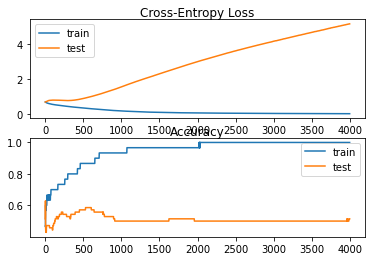

In [6]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

We can tie all of these pieces together; the complete example is listed below.

In [7]:
# overfit mlp for the moons dataset
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from matplotlib import pyplot

# generate 2d classification dataset
X, y = make_circles(n_samples=100, noise=0.2, random_state=1)

# split into train and test sets
n_train = 30
trainX, testX = X[:n_train, :], X[n_train:, :]
trainy, testy = y[:n_train], y[n_train:]

# define model
model = Sequential()
model.add(Dense(500, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# fit model
history = model.fit(trainX, trainy, epochs=4000, validation_data=(testX, testy), verbose=0)

# evaluate the model
_, train_acc = model.evaluate(trainX, trainy, verbose=0)
_, test_acc = model.evaluate(testX, testy, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 1.000, Test: 0.543


Running the example first reports the model performance on the train and test datasets. We can see that the model has better performance on the training dataset than the test dataset, one possible sign of overfitting.

**Note:** Your specific results may vary, given the stochastic nature of the learning algorithm. Consider running the example a few times and compare the average performance.

A figure is created showing line plots of the model loss and accuracy on the train and test sets. We can see the expected shape of an overfit model where test accuracy increases to a point and then begins to decrease again. The effect is even more dramatic with loss, showing a large increase in test set loss as training continues.

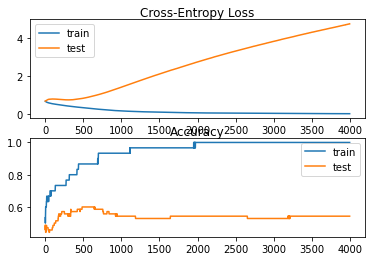

In [8]:
# plot loss learning curves
pyplot.subplot(211)
pyplot.title('Cross-Entropy Loss', pad=-40)
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()

# plot accuracy learning curves
pyplot.subplot(212)
pyplot.title('Accuracy', pad=-40)
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()

pyplot.show()

### MLP With Dropout Regularization

## Extensions

This section lists some ideas for extending the tutorial that you may wish to explore.

* **Input Dropout**. Update the example to use dropout on the input variables and compare results.
* **Weight Constraint**. Update the example to add a max-norm weight constraint to the hidden layer and compare results.
* **Repeated Evaluation**. Update the example to repeat the evaluation of the overfit and dropout model and summarize and compare the average results.
* **Grid Search Rate**. Develop a grid search of dropout probabilities and report the relationship between dropout rate and test set accuracy.

## Summary

In this tutorial, you discovered dropout regularization to reduce overfitting and improve the generalization of deep neural networks. Specifically, you learned:

* Large weights in a neural network signify a more complex network that has overfit the training data.
* Probabilistically dropping out nodes in the network is a simple and effective regularization method.
* A large network with more training epochs and the use of a weight constraint is suggested when using dropout.